In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
plt.rcParams['figure.figsize'] = (18, 9)
plt.rcParams['figure.titlesize'] = 'x-large'

In [ ]:
sns.set()

In [ ]:
# Reading the file directly from the link.
df= pd.read_csv(r'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')

# **Importing the dataset**

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
# converting all column names to smallcase for usability.
df.columns= df.columns.str.lower()

## **Exploratory Data Analysis**


1.   There are five hundered and fifty thousand records in the dataset and 10 features.
2.   There seems to be no missing values by using the dataFrame.info() method.
3.   There are five int64 and five object features in the dataset.
4.   There are five thousand eight hundered and ninty one unique users records in the data. There multiple purchases from a single users which is expected for purchase data.
5.   Using the dataFrame.describe method we can find that not all the Int64 features need to be coded that way. We will perform more analysis to figure out the right dtypes for these columns.
6.   There are three thousand six hundered and thrity one unique products bought by shoppers from walmart.




In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   user_id                     550068 non-null  int64 
 1   product_id                  550068 non-null  object
 2   gender                      550068 non-null  object
 3   age                         550068 non-null  object
 4   occupation                  550068 non-null  int64 
 5   city_category               550068 non-null  object
 6   stay_in_current_city_years  550068 non-null  object
 7   marital_status              550068 non-null  int64 
 8   product_category            550068 non-null  int64 
 9   purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df['user_id'].nunique()

5891

In [ ]:
df['product_id'].nunique()

3631

In [ ]:
df.describe()

,user_id,occupation,marital_status,product_category,purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


### dataFrame.describe for object dtypes


1.   product_id: Seems like a ***P00265242*** has been bought the most. We'll do further analysis to see if there are other interesting patterns with this product.
2.   gender: seems like ~**75**% of the records are for male so any analysis would be weighted towards the male gender.
3.   age: **26-35** age category seems like the most frequent demographic that shop with Walmart.
4.   city_category: residents of **B** seems to shop more at walmart.
5.   Most shoppers have lived close to **1 year** in the city.

In [ ]:
df.describe(include= 'object')

,product_id,gender,age,city_category,stay_in_current_city_years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


### Are there any unexpected values in the dataset?



1.   Looks like there are no unexpected values in the occupation, marital_status and product_category fields.
2.   However, there are clearly some occupations and product_category that are popular with the shoppers.
3.   Even though there's not an even split between married and unmarried. It's close with ~60% unmarried vs ~40% unmarried.
4.   The next steps is to convert these fields in to categories or objects to save space, make it easy to work with and more intuitional.


In [ ]:
columns_to_check = ['occupation', 'marital_status', 'product_category']

for col in columns_to_check:

  print(df[col].value_counts(normalize= True))
  print('_' * 20)

4     0.131453
0     0.126599
7     0.107501
1     0.086218
17    0.072796
20    0.061014
12    0.056682
14    0.049647
2     0.048336
16    0.046123
6     0.037005
3     0.032087
10    0.023506
5     0.022137
15    0.022115
11    0.021063
19    0.015382
13    0.014049
18    0.012039
9     0.011437
8     0.002811
Name: occupation, dtype: float64
____________________
0    0.590347
1    0.409653
Name: marital_status, dtype: float64
____________________
5     0.274390
1     0.255201
8     0.207111
11    0.044153
2     0.043384
6     0.037206
3     0.036746
4     0.021366
16    0.017867
15    0.011435
13    0.010088
10    0.009317
12    0.007175
7     0.006765
18    0.005681
20    0.004636
19    0.002914
14    0.002769
17    0.001051
9     0.000745
Name: product_category, dtype: float64
____________________


In [ ]:
for col in columns_to_check:
  df[col] = df[col].astype('category')

In [ ]:
df.describe(include= ['object', 'category'])

,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category
count,550068,550068,550068,550068,550068,550068,550068,550068
unique,3631,2,7,21,3,5,2,20
top,P00265242,M,26-35,4,B,1,0,5
freq,1880,414259,219587,72308,231173,193821,324731,150933


### What do visualizing these columns tell us about the data?


1.   1176 products make up ~80% of the purchases on walmart and;
2.   448 products make up ~50% of the purchases on walmart



In [ ]:
product_purchase_proportion= df['product_id'].value_counts(normalize= True)

(product_purchase_proportion[product_purchase_proportion.cumsum() <= 0.8].index).shape

(1176,)

In [ ]:
product_purchase_proportion= df['product_id'].value_counts(normalize= True)

(product_purchase_proportion[product_purchase_proportion.cumsum() <= 0.5].index).shape

(448,)

*   Looks like there is some difference between the purchase amount by gender at walmart. We will try to calculate if there's statistical significace between these differences.
*   Clearly walmart has majority of male shoppers (72%)
*   Seems like female shoppers at Walmart buy a variety of products given their population is low.
*   Looking at the histogram, and specifically setting it to density shows that ment tend to spend more on products vs female. However, these changes are seen very less often and we would need to see if there's any statistical significance in purchase amount influenced by gender
*  Looking at the KDE plot it is clear that on average Men shopper spend more at Walmart than women shoppers.
*  Based on the sample data it seems like Male shoppers spend 702 more than female shoppers.

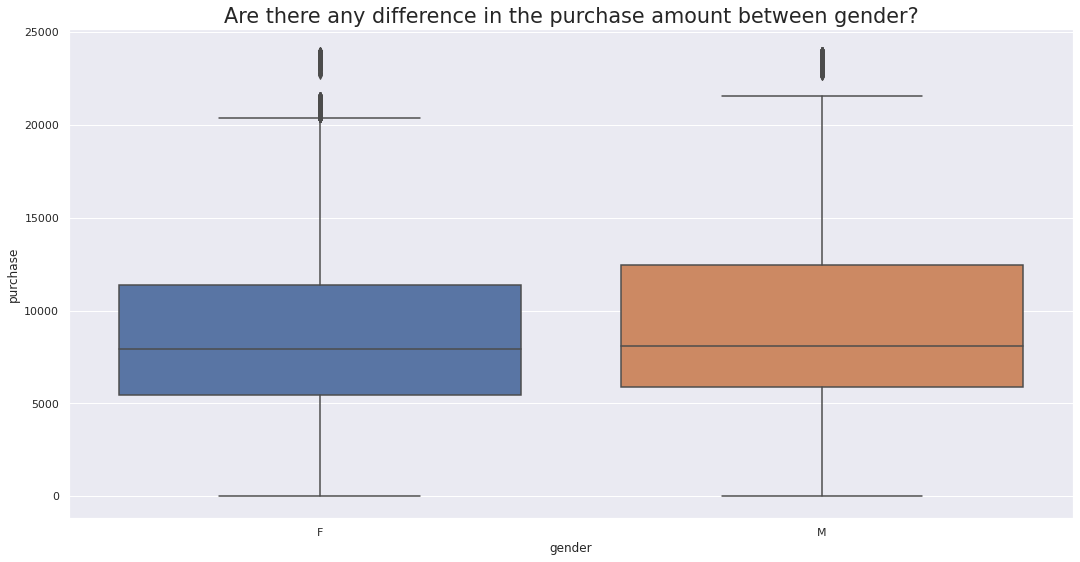

In [ ]:
sns.boxplot(data= df, x= 'gender', y= 'purchase')
plt.title('Are there any difference in the purchase amount between gender?', fontsize= 'xx-large')
plt.show()

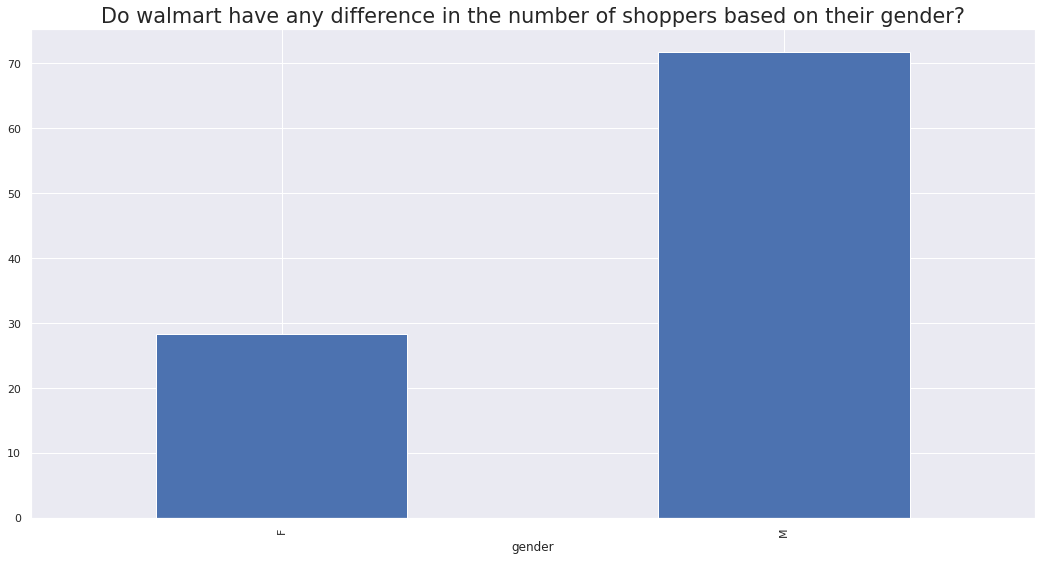

In [ ]:
df.groupby('gender')['user_id'].nunique().div(df['user_id'].nunique()).mul(100).round(2).plot(kind= 'bar')
plt.title('Do walmart have any difference in the number of shoppers based on their gender?', fontsize= 'xx-large')
plt.show()

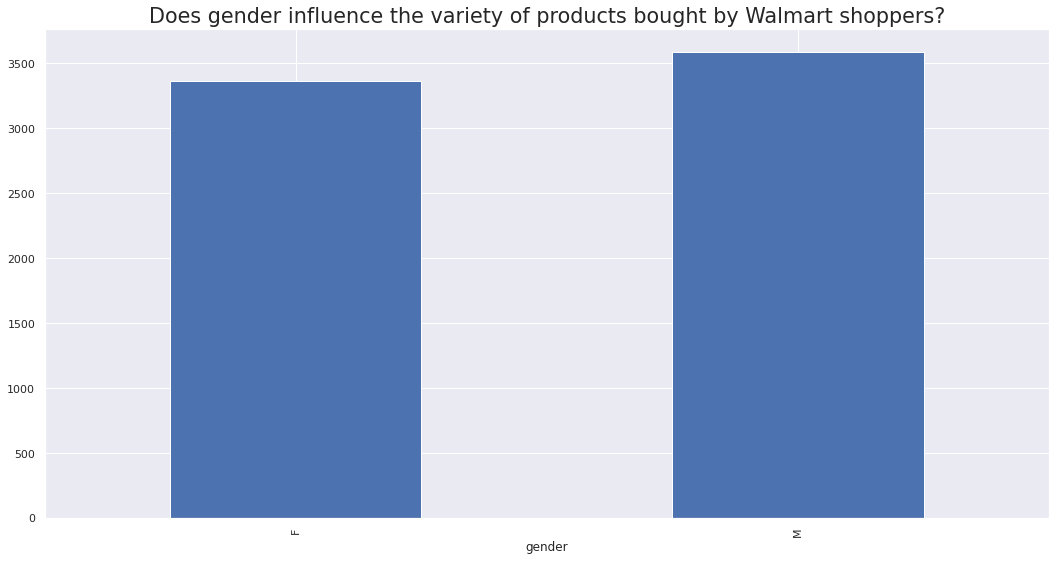

In [ ]:
# Is there a pattern on whether gender influence the variety of products bought by walmart shoppers.

df.groupby('gender')['product_id'].nunique().plot(kind= 'bar')
plt.title('Does gender influence the variety of products bought by Walmart shoppers?', fontsize= 'xx-large')
plt.show()

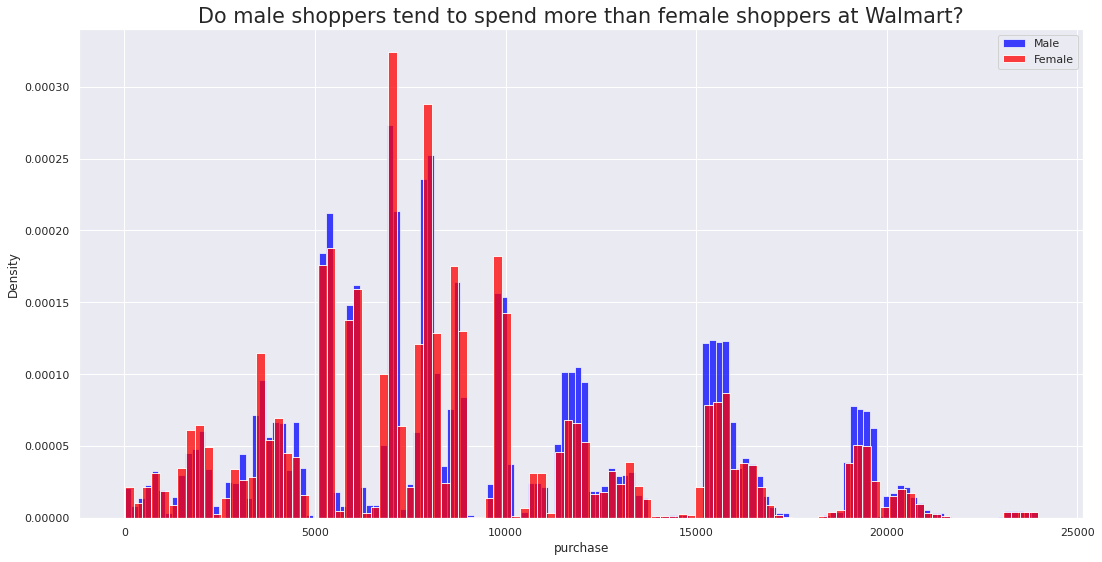

In [ ]:
# checking the histogram doesn't show
sns.histplot(df.loc[df['gender'] == 'M', 'purchase'], stat= 'density', color= 'blue', label= 'Male')
sns.histplot(df.loc[df['gender'] == 'F', 'purchase'], stat= 'density', color= 'red', label= 'Female')
plt.title('Do male shoppers tend to spend more than female shoppers at Walmart?', fontsize= 'xx-large')
plt.legend()
plt.show()

In [ ]:
avg_purchase= df.groupby('gender')['purchase'].mean().round(2)
median_purchase= df.groupby('gender')['purchase'].median().round(2)

Text(0.5, 1.0, 'Do normalizing for gender show any difference in purchase amount among male and female shoppers?')

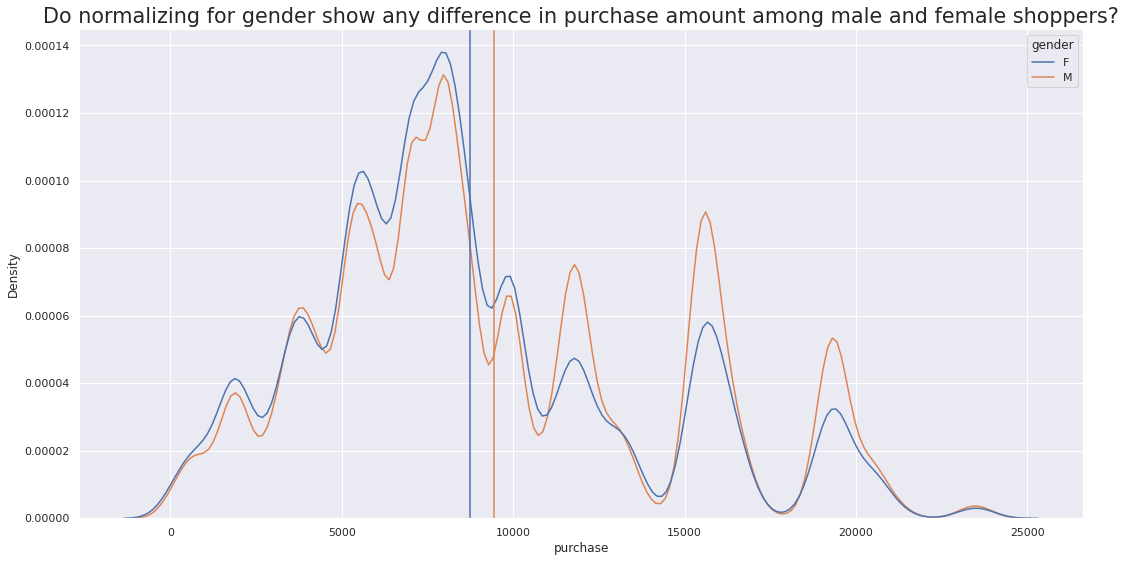

In [ ]:
sns.kdeplot(data= df, x= 'purchase', hue= 'gender', common_norm= False)
plt.axvline(x= avg_purchase.loc['M'], color= '#dd8452')
# plt.axvline(x= median_purchase.loc['M'])

plt.axvline(x= avg_purchase.loc['F'])
# plt.axvline(x= median_purchase.loc['F'], linestyle= '--')
plt.title('Do normalizing for gender show any difference in purchase amount among male and female shoppers?', fontsize= 'xx-large')

In [ ]:
men_average= df.loc[df['gender'] == 'M', 'purchase'].mean()
women_average= df.loc[df['gender'] == 'F', 'purchase'].mean()
print(men_average, women_average)

9437.526040472265 8734.565765155476


# CLT for average purchase.
We will run a CLT to understand if the average spend is actually lower for female shoppers or is due to chance.

* Based on the KDE plot it seems like there's some overlap in the means. This means nothing and doesn't show that they overlap. We should the if they intersect with a 95% confidence level.
* Based on the confidence interval it seems like men do spend more on average than women in walmart

In [ ]:
n= 1000 # is the number of experiments we are going to run
men_average= np.empty(n)
women_average= np.empty(n)

for i in range(n):
  men_average[i]= df.loc[df['gender'] == 'M', 'purchase'].sample(1000).mean()
  women_average[i]= df.loc[df['gender'] == 'F', 'purchase'].sample(1000).mean()

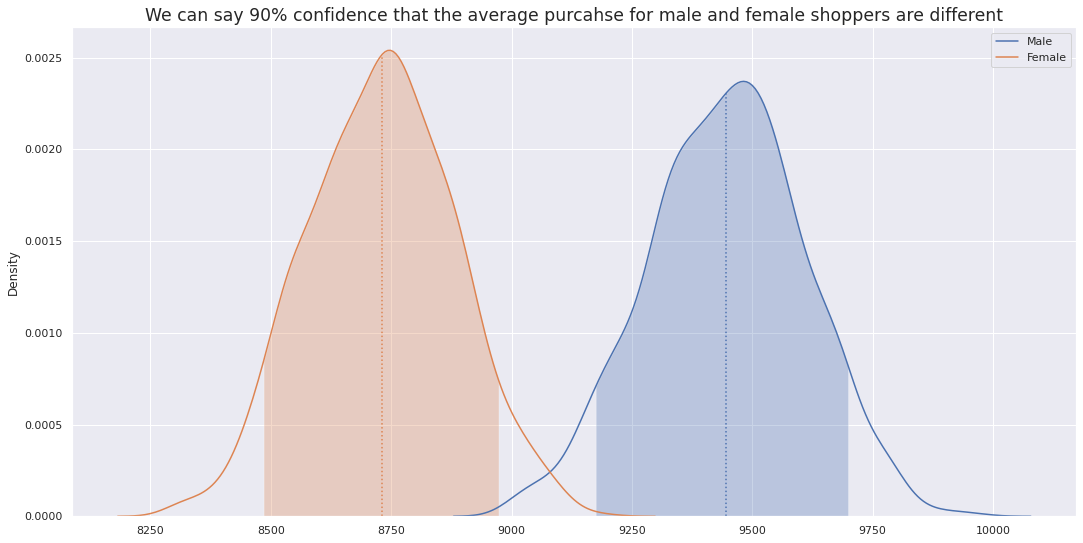

In [ ]:
# This plot men's confidence interval
men_mean= men_average.mean()
men_lower_bound= np.percentile(men_average, 5)
men_upper_bound= np.percentile(men_average, 95)

ax= sns.kdeplot(men_average, label= 'Male', color= '#4c72b0')
kde_line= ax.lines[0]
xs= kde_line.get_xdata()
ys= kde_line.get_ydata()
ax.vlines(men_mean, 0, np.interp(men_mean, xs, ys), color= '#4c72b0', ls= ':')
fill_between_idx= np.where((xs >= men_lower_bound) & (xs <= men_upper_bound))
ax.fill_between(xs[fill_between_idx], 0, ys[fill_between_idx], alpha= 0.3)

# This plots women's confidence interval
women_mean= women_average.mean()
women_lower_bound= np.percentile(women_average, 5)
women_upper_bound= np.percentile(women_average, 95)

ax= sns.kdeplot(women_average, label= 'Female', color= '#dd8452')
kde_line= ax.lines[1]
xs= kde_line.get_xdata()
ys= kde_line.get_ydata()
ax.vlines(women_mean, 0, np.interp(women_mean, xs, ys), color= '#dd8452', ls= ':')
fill_between_idx= np.where((xs >= women_lower_bound) & (xs <= women_upper_bound))
ax.fill_between(xs[fill_between_idx], 0, ys[fill_between_idx], alpha= 0.3)

plt.legend()
plt.title('We can say 90% confidence that the average purcahse for male and female shoppers are different', fontsize= 'x-large')
plt.show()

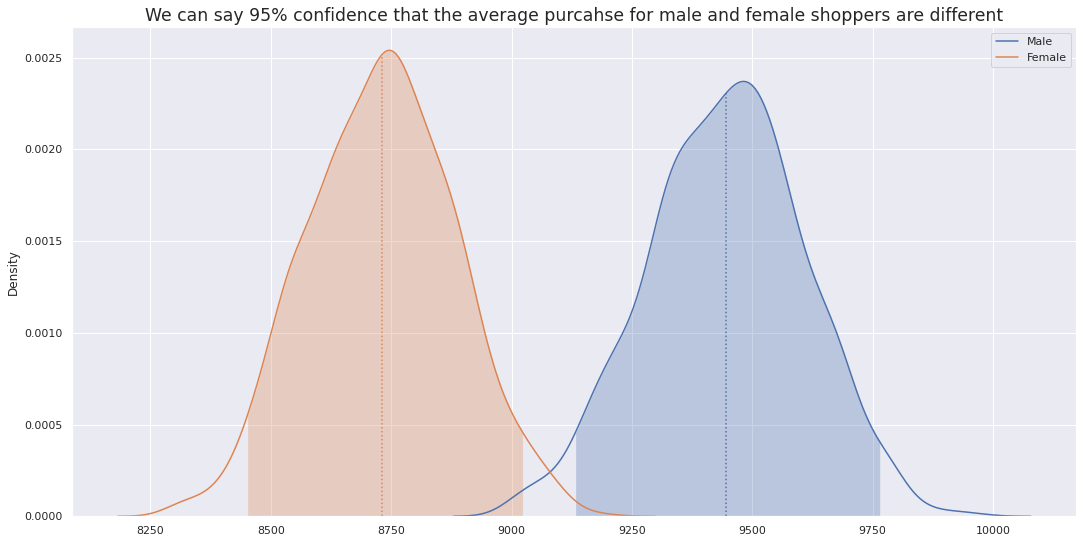

In [ ]:
# This plot men's confidence interval
men_mean= men_average.mean()
men_lower_bound= np.percentile(men_average, 2.5)
men_upper_bound= np.percentile(men_average, 97.5)

ax= sns.kdeplot(men_average, label= 'Male', color= '#4c72b0')
kde_line= ax.lines[0]
xs= kde_line.get_xdata()
ys= kde_line.get_ydata()
ax.vlines(men_mean, 0, np.interp(men_mean, xs, ys), color= '#4c72b0', ls= ':')
fill_between_idx= np.where((xs >= men_lower_bound) & (xs <= men_upper_bound))
ax.fill_between(xs[fill_between_idx], 0, ys[fill_between_idx], alpha= 0.3)

# This plots women's confidence interval
women_mean= women_average.mean()
women_lower_bound= np.percentile(women_average, 2.5)
women_upper_bound= np.percentile(women_average, 97.5)

ax= sns.kdeplot(women_average, label= 'Female', color= '#dd8452')
kde_line= ax.lines[1]
xs= kde_line.get_xdata()
ys= kde_line.get_ydata()
ax.vlines(women_mean, 0, np.interp(women_mean, xs, ys), color= '#dd8452', ls= ':')
fill_between_idx= np.where((xs >= women_lower_bound) & (xs <= women_upper_bound))
ax.fill_between(xs[fill_between_idx], 0, ys[fill_between_idx], alpha= 0.3)

plt.legend()
plt.title('We can say 95% confidence that the average purcahse for male and female shoppers are different', fontsize= 'x-large')
plt.show()

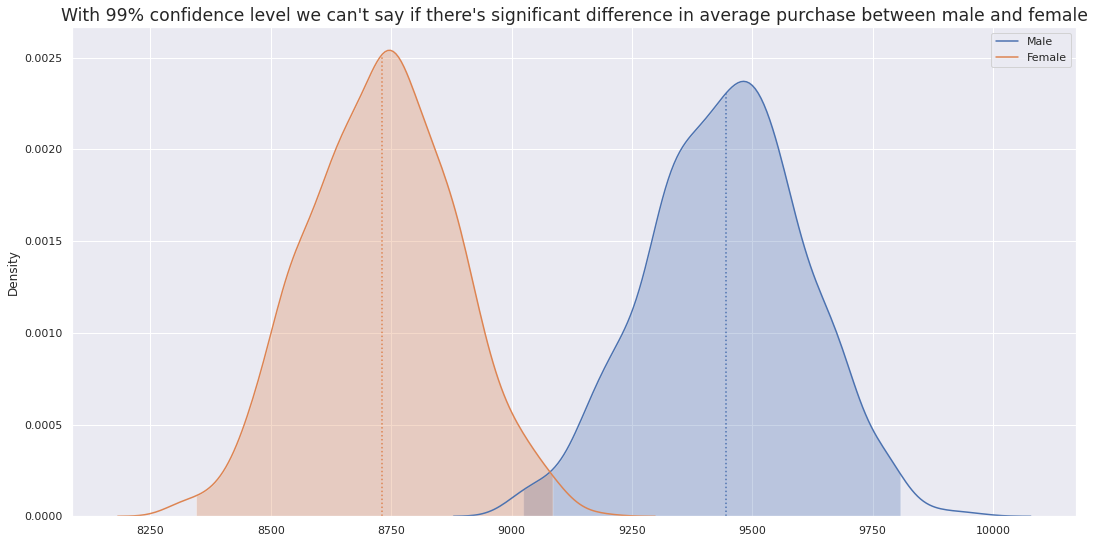

In [ ]:
# This plot men's confidence interval
men_mean= men_average.mean()
men_lower_bound= np.percentile(men_average, 0.5)
men_upper_bound= np.percentile(men_average, 99.5)

ax= sns.kdeplot(men_average, label= 'Male', color= '#4c72b0')
kde_line= ax.lines[0]
xs= kde_line.get_xdata()
ys= kde_line.get_ydata()
ax.vlines(men_mean, 0, np.interp(men_mean, xs, ys), color= '#4c72b0', ls= ':')
fill_between_idx= np.where((xs >= men_lower_bound) & (xs <= men_upper_bound))
ax.fill_between(xs[fill_between_idx], 0, ys[fill_between_idx], alpha= 0.3)

# This plots women's confidence interval
women_mean= women_average.mean()
women_lower_bound= np.percentile(women_average, 0.5)
women_upper_bound= np.percentile(women_average, 99.5)

ax= sns.kdeplot(women_average, label= 'Female', color= '#dd8452')
kde_line= ax.lines[1]
xs= kde_line.get_xdata()
ys= kde_line.get_ydata()
ax.vlines(women_mean, 0, np.interp(women_mean, xs, ys), color= '#dd8452', ls= ':')
fill_between_idx= np.where((xs >= women_lower_bound) & (xs <= women_upper_bound))
ax.fill_between(xs[fill_between_idx], 0, ys[fill_between_idx], alpha= 0.3)

plt.legend()
plt.title('With 99% confidence level we can\'t say if there\'s significant difference in average purchase between male and female', fontsize= 'x-large')
plt.show()

# Are there any difference between married and un-married shoppers?

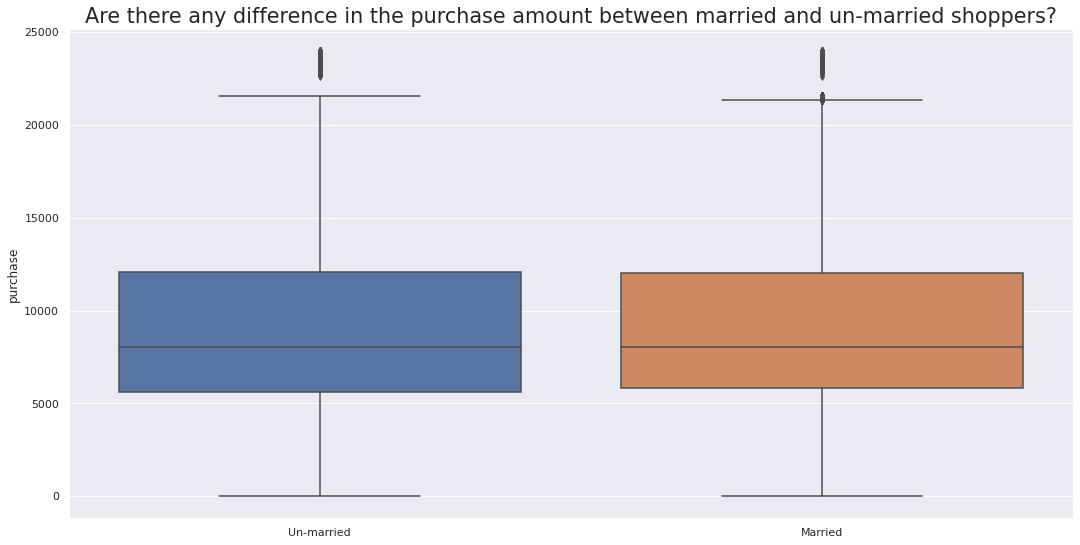

In [ ]:
sns.boxplot(data= df, x= 'marital_status', y= 'purchase')
plt.title('Are there any difference in the purchase amount between married and un-married shoppers?', fontsize= 'xx-large')
plt.xticks(range(2), ['Un-married', 'Married'])
plt.xlabel('')
plt.show()

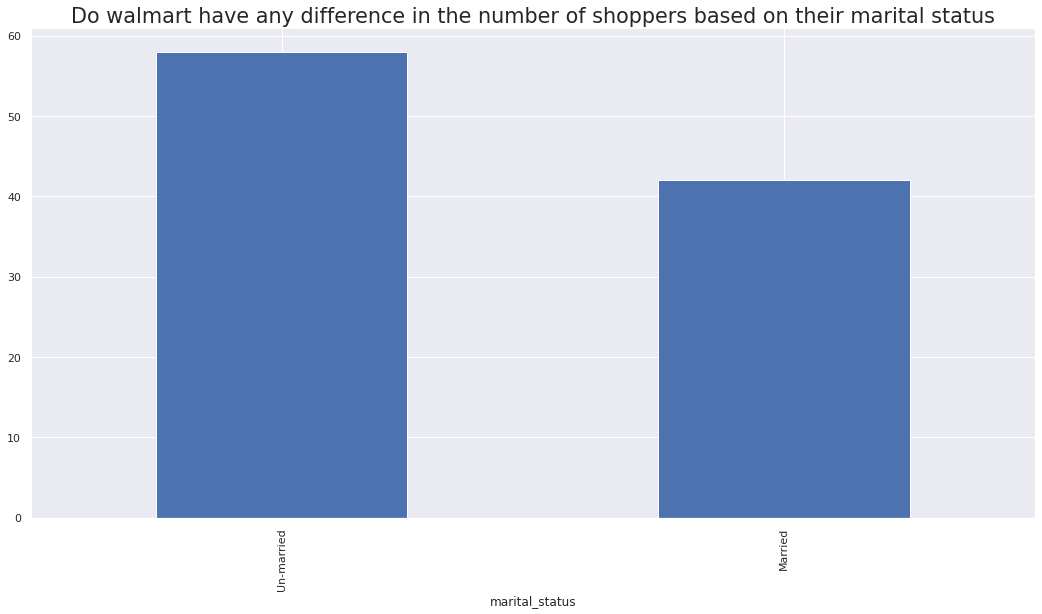

In [ ]:
df.groupby('marital_status')['user_id'].nunique().div(df['user_id'].nunique()).mul(100).round(2).plot(kind= 'bar')
plt.title('Do walmart have any difference in the number of shoppers based on their marital status', fontsize= 'xx-large')
plt.xticks(range(2), ['Un-married', 'Married'])
plt.show()

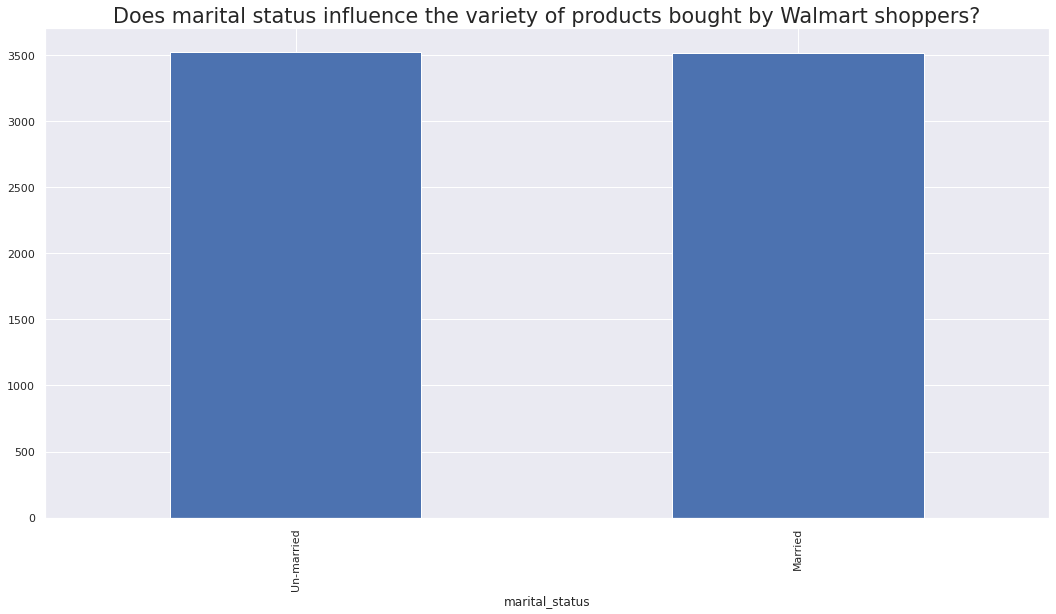

In [ ]:
df.groupby('marital_status')['product_id'].nunique().plot(kind= 'bar')
plt.title('Does marital status influence the variety of products bought by Walmart shoppers?', fontsize= 'xx-large')
plt.xticks(range(2), ['Un-married', 'Married'])
plt.show()

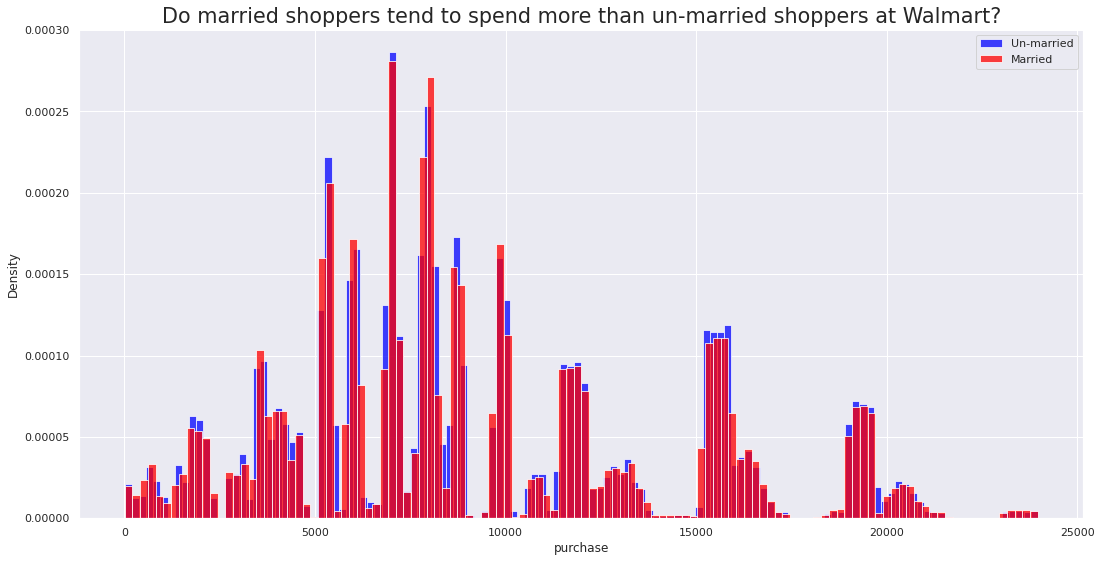

In [ ]:
# Looking at the histogram looks like there's not much difference in the way un-married and married shoppers spend at Walmart
sns.histplot(df.loc[df['marital_status'] == 0, 'purchase'], stat= 'density', color= 'blue', label= 'Un-married')
sns.histplot(df.loc[df['marital_status'] == 1, 'purchase'], stat= 'density', color= 'red', label= 'Married')
plt.title('Do married shoppers tend to spend more than un-married shoppers at Walmart?', fontsize= 'xx-large')
plt.legend()
plt.show()

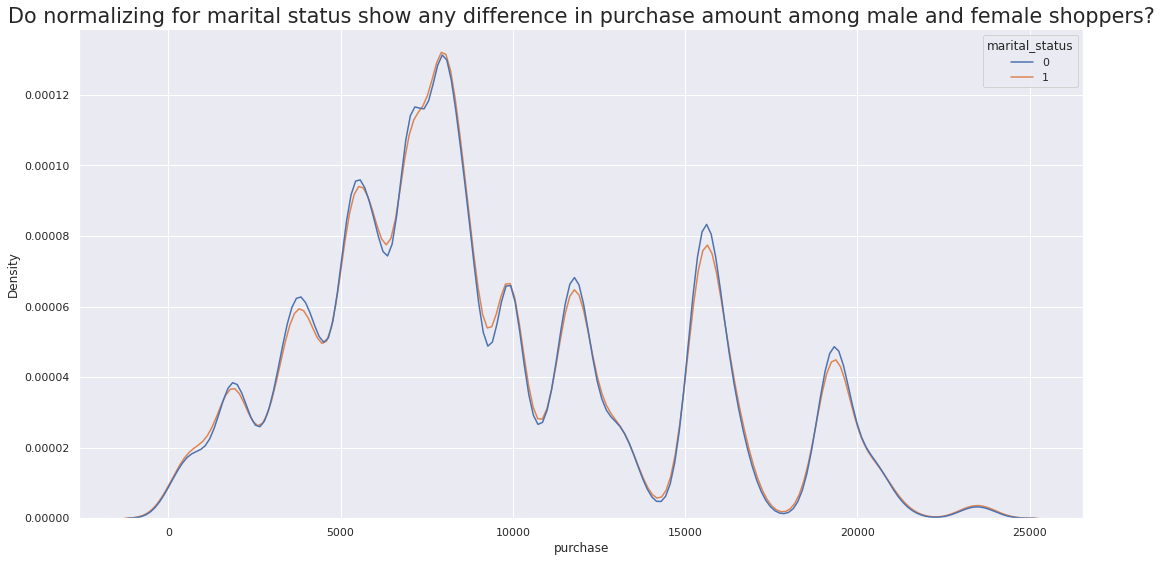

In [ ]:
sns.kdeplot(data= df, x= 'purchase', hue= 'marital_status', common_norm= False, label= ['Un-married', 'Married'])
plt.title('Do normalizing for marital status show any difference in purchase amount among male and female shoppers?', fontsize= 'xx-large')
plt.show()

In [ ]:
men_average= df.loc[df['marital_status'] == 0, 'purchase'].mean().round(2)
women_average= df.loc[df['marital_status'] == 1, 'purchase'].mean().round(2)
print(men_average, women_average)

9265.91 9261.17


In [ ]:
n= 1000 # is the number of experiments we are going to run
un_married_samples= np.empty(n)
married_samples= np.empty(n)

for i in range(n):
  un_married_samples[i]= df.loc[df['marital_status'] == 0, 'purchase'].sample(1000).mean()
  married_samples[i]= df.loc[df['marital_status'] == 1, 'purchase'].sample(1000).mean()

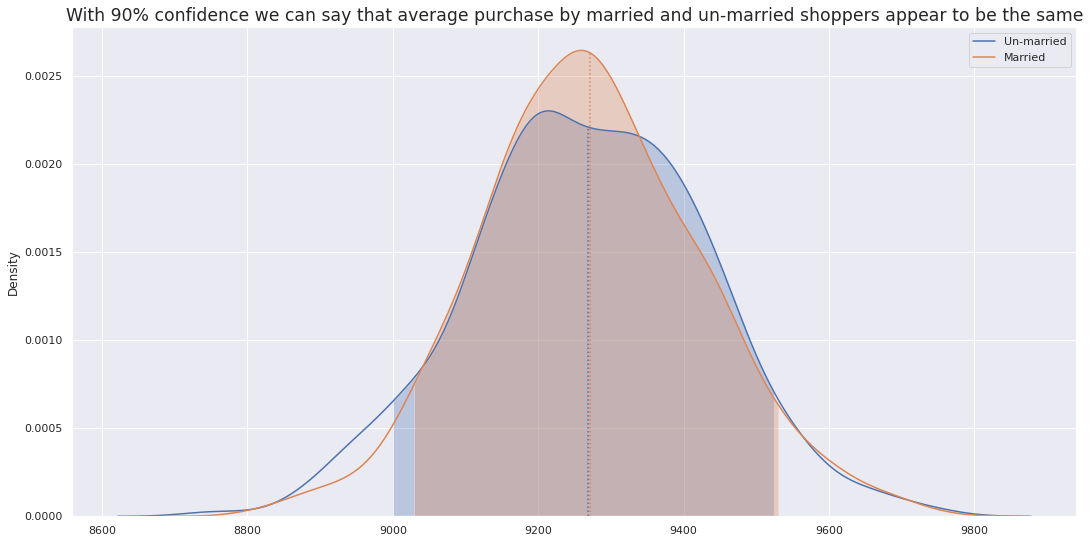

In [ ]:
# This plot men's confidence interval
un_married_mean= un_married_samples.mean()
unmarried_lower_bound= np.percentile(un_married_samples, 5)
unmarried_upper_bound= np.percentile(un_married_samples, 95)

ax= sns.kdeplot(un_married_samples, label= 'Un-married', color= '#4c72b0')
kde_line= ax.lines[0]
xs= kde_line.get_xdata()
ys= kde_line.get_ydata()
ax.vlines(un_married_mean, 0, np.interp(un_married_mean, xs, ys), color= '#4c72b0', ls= ':')
fill_between_idx= np.where((xs >= unmarried_lower_bound) & (xs <= unmarried_upper_bound))
ax.fill_between(xs[fill_between_idx], 0, ys[fill_between_idx], alpha= 0.3)

# This plots women's confidence interval
married_mean= married_samples.mean()
married_lower_bound= np.percentile(married_samples, 5)
married_upper_bound= np.percentile(married_samples, 95)

ax= sns.kdeplot(married_samples, label= 'Married', color= '#dd8452')
kde_line= ax.lines[1]
xs= kde_line.get_xdata()
ys= kde_line.get_ydata()
ax.vlines(married_mean, 0, np.interp(married_mean, xs, ys), color= '#dd8452', ls= ':')
fill_between_idx= np.where((xs >= married_lower_bound) & (xs <= married_upper_bound))
ax.fill_between(xs[fill_between_idx], 0, ys[fill_between_idx], alpha= 0.3)

plt.legend()
plt.title('With 90% confidence we can say that average purchase by married and un-married shoppers appear to be the same', fontsize= 'x-large')
plt.show()

# Recommendations

## Based on the CLT there seems to be a difference in the average purchase of male and femal shoppers.
## This seems like a really good opportunity to increase the average purchase amount for female shoppers.
## Walmart should investigate if there's opportunity and budget for marketing to help increase the average spending for female customers.